In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
apoptosis <- read.csv("../data/apoptosis_results.csv", header = TRUE, sep = ",")
pyroptosis <- read.csv("../data/pyroptosis_results.csv", header = TRUE, sep = ",")
necrosis <- read.csv("../data/necrosis_results.csv", header = TRUE, sep = ",")
ferroptosis <- read.csv("../data/ferroptosis_results.csv", header = TRUE, sep = ",")
autophagy <- read.csv("../data/autophagy_results.csv", header = TRUE, sep = ",")

apoptosis$label <- "Apoptosis"
pyroptosis$label <- "Pyroptosis"
necrosis$label <- "Necrosis"
ferroptosis$label <- "Ferroptosis"
autophagy$label <- "Autophagy"

In [3]:
# create output directory
outdir <- file.path("..","figures")

# create output directory if it doesn't exist
if(!dir.exists(outdir)) dir.create(outdir)

In [4]:
# remove the first row of each data frame
apoptosis <- apoptosis[-1,]
pyroptosis <- pyroptosis[-1,]
necrosis <- necrosis[-1,]
ferroptosis <- ferroptosis[-1,]
autophagy <- autophagy[-1,]

# make the row names a column
apoptosis$year <- rownames(apoptosis)
pyroptosis$year <- rownames(pyroptosis)
necrosis$year <- rownames(necrosis)
ferroptosis$year <- rownames(ferroptosis)
autophagy$year <- rownames(autophagy)

# # removve the row names
rownames(apoptosis) <- NULL
rownames(pyroptosis) <- NULL
rownames(necrosis) <- NULL
rownames(ferroptosis) <- NULL
rownames(autophagy) <- NULL

# # rename the columns
colnames(apoptosis) <- c("count", "label", "year")
colnames(pyroptosis) <- c("count", "label", "year")
colnames(necrosis) <- c("count", "label", "year")
colnames(ferroptosis) <- c("count", "label", "year")
colnames(autophagy) <- c("count", "label", "year")

# # combine the data frames
df <- rbind(apoptosis, pyroptosis, necrosis, ferroptosis, autophagy)
# sort the data frame by year
# make the year a integer
df$year <- as.integer(df$year)
# make the count a integer
df$count <- as.integer(df$count)

In [5]:
# remove 2024 data
df <- df[df$year != 2025,]

In [6]:
head(df)

,count,label,year
,<int>,<chr>,<int>
2,34084,Apoptosis,2024
3,32947,Apoptosis,2023
4,36023,Apoptosis,2022
5,38641,Apoptosis,2021
6,38332,Apoptosis,2020
7,35140,Apoptosis,2019


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


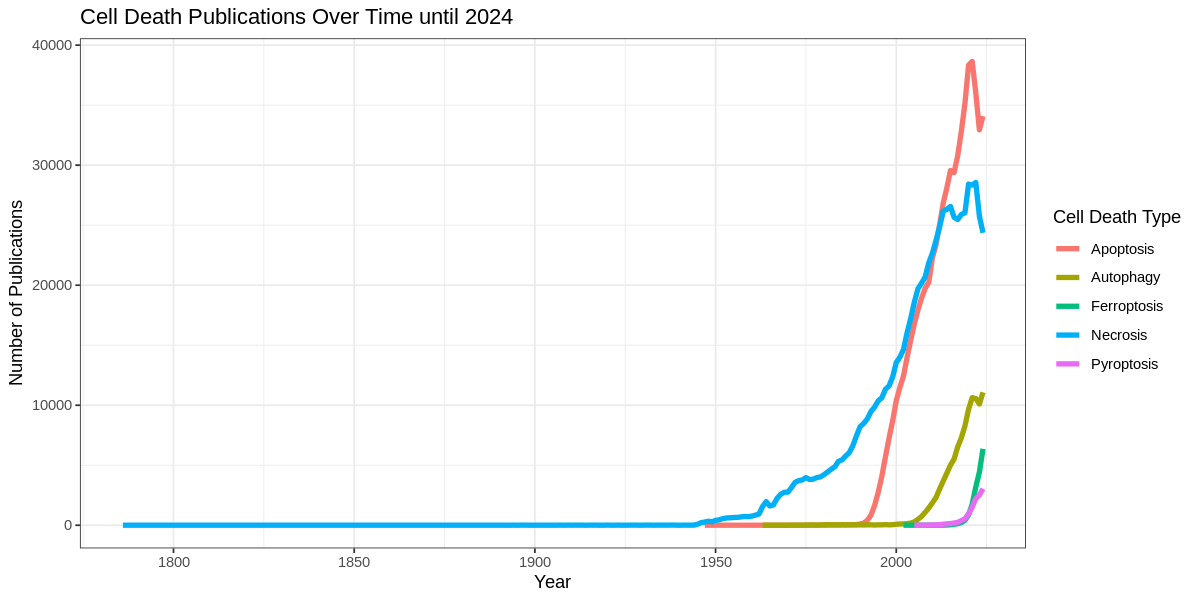

In [7]:
width <- 10
height <- 5
# set the size of the plot
options(repr.plot.width = width, repr.plot.height = height)
# plot 
plot <- (
    ggplot(
        data = df,
        aes(
            x = year,
            y = count,
            color = label
        )
    )
    + geom_path(
        size = 1.5
    )
    + theme_bw()
    # make the legend title different
    + labs(
        color = "Cell Death Type",
        x = "Year",
        y = "Number of Publications",
        title = "Cell Death Publications Over Time until 2024"
    )
)
# save the plot
ggsave(
    filename = "../figures/cell_death_over_time.png",
    plot = plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
plot

In [8]:
# remove all points before 1950
df <- df[df$year >= 1990,]

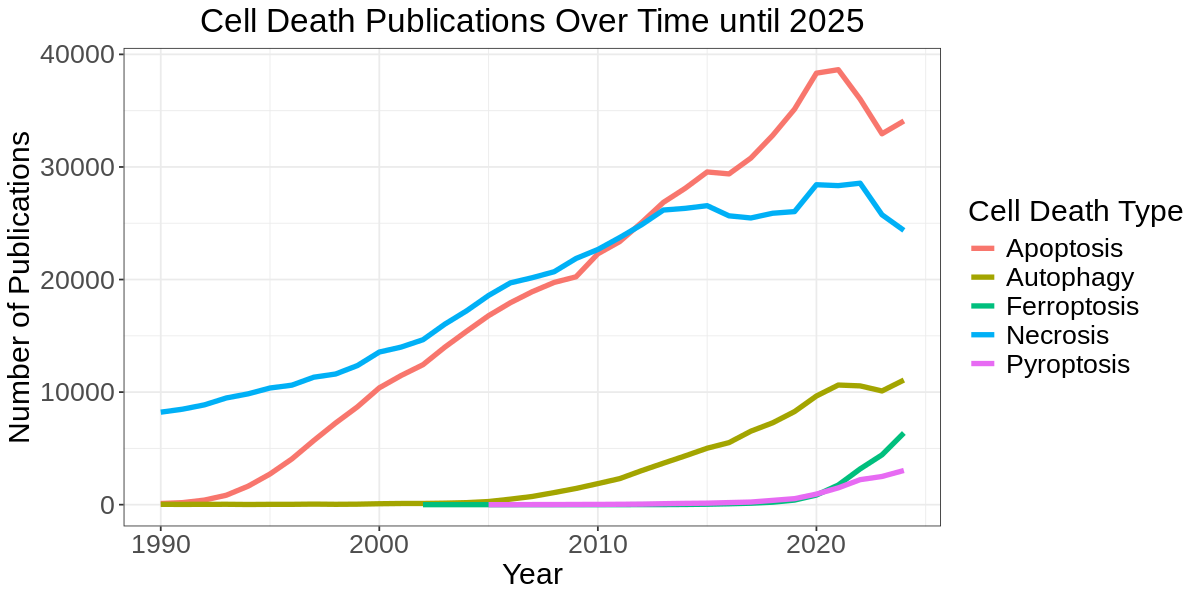

In [9]:
width <- 10
height <- 5
# set the size of the plot
options(repr.plot.width = width, repr.plot.height = height)
# plot 
plot <- (
    ggplot(
        data = df,
        aes(
            x = year,
            y = count,
            color = label
        )
    )
    + geom_path(
        size = 1.5
    )
    + theme_bw()
    # make the legend title different
    + labs(
        color = "Cell Death Type",
        x = "Year",
        y = "Number of Publications",
        title = "Cell Death Publications Over Time until 2025"
    )
    + xlim(min(df$year), 2024)
    # center title
    + theme(
        plot.title = element_text(
            size = 20,
            hjust = 0.5
        )
        # x axis text
        , axis.text.x = element_text(
            size = 16
        )
        # y axis text
        , axis.text.y = element_text(
            size = 16
        )
        # x axis title
        , axis.title.x = element_text(
            size = 18
        )
        # y axis title
        , axis.title.y = element_text(
            size = 18
        )
    )
    # legend text
    + theme(
        legend.text = element_text(
            size = 16
        )
    )
    # legend title
    + theme(
        legend.title = element_text(
            size = 18
        )
    )
)
# save the plot
ggsave(
    filename = "../figures/cell_death_over_time_1990.png",
    plot = plot,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
plot